# Dataframes
Bi-dimensional data structure. It has a row-column structure, each row has an index. It's the main object when working with pandas.

# Series
Uni-dimensional data list. Each column of a df is a series of data. Also each row is considered a series on its own.

In [2]:
import pandas as pd

In [3]:
providerSales = pd.read_csv('./data/VentasPorProveedor.csv', sep=';', skiprows=5)

In [4]:
providerSales

,Fecha,Vendedor,Región,Artículo,Categoría,Unidades,Ganancia
0,1/1/2016,Steve Ashton,Norte,Medias Femeninas,Vestimenta,6,"18,00"
1,1/1/2016,Trevor Snodgrass,Oeste,Chocolate,Comestibles,8,"3,84"
2,1/1/2016,Sarah Bond,Sur,Gorras,Vestimenta,3,"6,30"
3,1/1/2016,Desmond Delaney,Sur,Sánguche de Queso,Comestibles,9,"14,40"
4,1/1/2016,Desmond Delaney,Este,Chocolate,Comestibles,14,"6,72"
...,...,...,...,...,...,...,...
455,31/1/2016,Sarah Bond,Sur,Bufanda,Vestimenta,6,"16,50"
456,31/1/2016,Dustin Gee,Este,Sandalias,Vestimenta,11,"115,50"
457,31/1/2016,Dustin Gee,Este,Sánguche de Queso,Comestibles,4,"6,40"
458,31/1/2016,Dustin Gee,Norte,Escobillón,Hogar,8,"6,80"


In [5]:
providerSales.shape
print("rows", providerSales.shape[0])
print("columns", providerSales.shape[1])
providerSales.info()

rows 460
columns 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha      460 non-null    object
 1   Vendedor   460 non-null    object
 2   Región     460 non-null    object
 3   Artículo   460 non-null    object
 4   Categoría  460 non-null    object
 5   Unidades   460 non-null    int64 
 6   Ganancia   460 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.3+ KB


## Value conunts

It displays the unique records on a given series with it's frequency. Values will be displayed from the highest frequency to the lowest frequency.

In [6]:
providerSales['Región'].value_counts()

Región
Este     138
Sur      120
Oeste    102
Norte    100
Name: count, dtype: int64

In [7]:
providerSales[providerSales['Vendedor'].str.contains('Trevor')]

,Fecha,Vendedor,Región,Artículo,Categoría,Unidades,Ganancia
1,1/1/2016,Trevor Snodgrass,Oeste,Chocolate,Comestibles,8,"3,84"
5,1/1/2016,Trevor Snodgrass,Este,Cerveza,Comestibles,15,"6,00"
8,1/1/2016,Trevor Snodgrass,Este,Pan,Comestibles,12,"4,80"
10,1/1/2016,Trevor Snodgrass,Sur,Pan,Comestibles,6,"2,40"
12,1/1/2016,Trevor Snodgrass,Sur,Shorts,Vestimenta,6,"29,40"
...,...,...,...,...,...,...,...
437,30/1/2016,Trevor Snodgrass,Este,Calcetines,Vestimenta,10,"22,50"
440,30/1/2016,Trevor Snodgrass,Este,Gorras,Vestimenta,6,"12,60"
442,31/1/2016,Trevor Snodgrass,Este,Sandalias,Vestimenta,6,"63,00"
446,31/1/2016,Trevor Snodgrass,Oeste,Sudadera,Vestimenta,2,"12,00"


# Matplotlib usage

Package used to easily build a great variety of graphs. You can the decide the graph you want to display with the kind parameter inside the plot function.

In order to display the plot within the same line of code in which you crafted your graph, you just have to add the '%matplotlib inline' decorator at the end of the line.

In [8]:
import matplotlib as plt

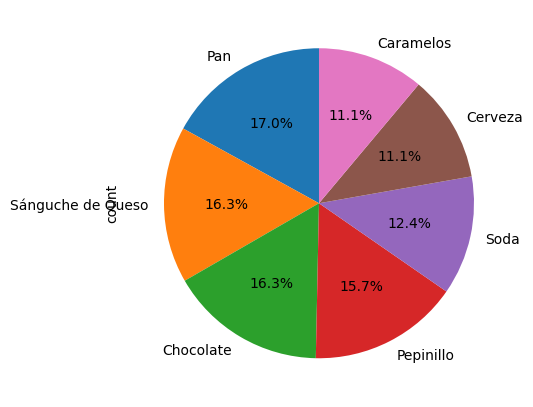

In [9]:
pie_plot_data = providerSales[providerSales['Categoría'] == 'Comestibles']
pie_plot_data['Artículo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5,10));

## Indexing

Is an immutable object that allow us to access rows/columns based on an index. As mentioned, pandas dataframes have a default index, but it can me modified in order to use another column as the index of your data. This can be achieved by using the set_index() method.

# GROUP BY
What really happens in group by statements with pandas df's is that creates several "DataFrameGroupBy" inside a list in the form of key-value elements. The key are the elements (series) within the groupBy statement, the values are all the dataframes that match each key.

In [18]:
grouped_data = pie_plot_data.groupby(['Artículo', 'Categoría'])

type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [19]:
list(grouped_data)

[(('Caramelos', 'Comestibles'),
           Fecha          Vendedor Región   Artículo    Categoría  Unidades  \
  9     1/1/2016        Sarah Bond   Este  Caramelos  Comestibles        15   
  47    4/1/2016        Dustin Gee    Sur  Caramelos  Comestibles        12   
  113   8/1/2016   Desmond Delaney   Este  Caramelos  Comestibles         3   
  173  11/1/2016    Boris Stanford    Sur  Caramelos  Comestibles         5   
  250  16/1/2016    Boris Stanford  Norte  Caramelos  Comestibles         7   
  253  17/1/2016      Steve Ashton  Norte  Caramelos  Comestibles         2   
  258  17/1/2016   Desmond Delaney   Este  Caramelos  Comestibles        10   
  286  19/1/2016  Trevor Snodgrass  Oeste  Caramelos  Comestibles         7   
  295  20/1/2016      Steve Ashton  Norte  Caramelos  Comestibles        10   
  300  20/1/2016      Steve Ashton  Norte  Caramelos  Comestibles         3   
  303  20/1/2016        Sarah Bond  Norte  Caramelos  Comestibles        15   
  326  22/1/2016  Tr

# Aggregation functions
After the group by after what we have seen, we will end up with a list of all the dataframes that match each key. When we perform aggregation functions, if we only specify the aggregation that we want, pandas will assume that we want to apply that aggregation for all the columns within the groupedDataFrame. 

In [20]:
grouped_data.agg(['min', 'max'])

Fecha                  Vendedor  \
                                     min       max             min   
Artículo          Categoría                                          
Caramelos         Comestibles   1/1/2016  8/1/2016  Boris Stanford   
Cerveza           Comestibles   1/1/2016  6/1/2016  Boris Stanford   
Chocolate         Comestibles   1/1/2016  8/1/2016  Boris Stanford   
Pan               Comestibles   1/1/2016  8/1/2016  Boris Stanford   
Pepinillo         Comestibles   1/1/2016  9/1/2016  Boris Stanford   
Soda              Comestibles  11/1/2016  9/1/2016  Boris Stanford   
Sánguche de Queso Comestibles   1/1/2016  9/1/2016  Boris Stanford   

                                                Región      Unidades      \
                                            max    min  max      min max   
Artículo          Categoría                                                
Caramelos         Comestibles  Trevor Snodgrass   Este  Sur        2  15   
Cerveza           Comestibles  Trevor Snodgrass   Este  Sur        1  15   
Chocolate         Comestibles  Trevor Snodgrass   Este  Sur        2  14   
Pan               Comestibles  Trevor Snodgrass   Este  Sur        2  15   
Pepinillo         Comestibles  Trevor Snodgrass   Este  Sur        2  15   
Soda              Comestibles  Trevor Snodgrass   Este  Sur        1  14   
Sánguche de Queso Comestibles  Trevor Snodgrass   Este  Sur        2  15   

                              Ganancia        
                                   min   max  
Artículo          Categoría                   
Caramelos         Comestibles     1,20  9,00  
Cerveza           Comestibles     0,40  6,00  
Chocolate         Comestibles     0,96  6,72  
Pan               Comestibles     0,80  6,00  
Pepinillo         Comestibles     0,60  4,50  
Soda              Comestibles     0,64  8,96  
Sánguche de Queso Comestibles    11,20  9,60

## Aggregations for specific columns

We can use a dictionary as a param for the aggregation method in order to map the specific columns (series) in which we want to perform specific aggregations. Therefore we are updating the default behavior of grouped data (aggregations to all the columns) to only apply them to the specific columns that we really want

In [21]:
grouped_data.agg({'Ganancia' : ['min', 'max', 'count']})

Ganancia            
                                   min   max count
Artículo          Categoría                       
Caramelos         Comestibles     1,20  9,00    17
Cerveza           Comestibles     0,40  6,00    17
Chocolate         Comestibles     0,96  6,72    25
Pan               Comestibles     0,80  6,00    26
Pepinillo         Comestibles     0,60  4,50    24
Soda              Comestibles     0,64  8,96    19
Sánguche de Queso Comestibles    11,20  9,60    25